# Hello World of Machine Learning
The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).

Attributes are numeric so you have to figure out how to load and handle data.
It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.
Letâ€™s get started with your hello world machine learning project in Python.

# Check Versions

In [14]:
# Python version
import sys
print('Python: {}'.format(sys.version))

# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))

# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
scipy: 0.19.1
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1


#  Start Python and Import libraries

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset

In [2]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# Dimensions of Dataset

In [4]:
# shape
print(dataset.shape)

(150, 5)


# show the data head

In [5]:

print(dataset.tail(20))

     sepal-length  sepal-width  petal-length  petal-width           class
130           7.4          2.8           6.1          1.9  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
132           6.4          2.8           5.6          2.2  Iris-virginica
133           6.3          2.8           5.1          1.5  Iris-virginica
134           6.1          2.6           5.6          1.4  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica
136           6.3          3.4           5.6          2.4  Iris-virginica
137           6.4          3.1           5.5          1.8  Iris-virginica
138           6.0          3.0           4.8          1.8  Iris-virginica
139           6.9          3.1           5.4          2.1  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7        

In [13]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


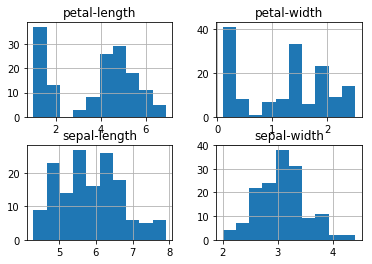

In [14]:
# histograms
dataset.hist()
plt.show()

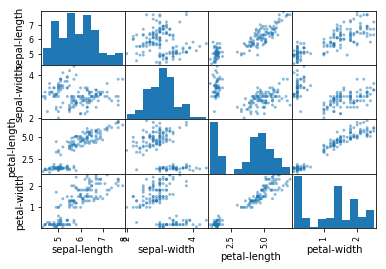

In [15]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [16]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [18]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [19]:
# Make predictions on validation dataset
# Make predictions on validation dataset
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions =SVM.predict(X_validation)
print(accuracy_score(Y_validation, predictions))





0.933333333333


# our Final prediction

In [20]:
test_X=[[5.9 ,3.0 ,5.1 ,1.8]]
print(SVM.predict(test_X))

['Iris-virginica']
